In [2]:
import pandas as pd
print(pd.__version__)

1.4.2


Number of rows: 5
Number of columns: 5
Shape of the table: (5, 5)
Number of elements: 25
This is what the dataframe looks like: 


,Name,People,Area,BIP,Currency
0,Germany,82521653,357385,3466,EUR
1,Japan,126045000,377835,4938,YEN
2,Canada,36503097,9984670,1529,CAD
3,Italy,60501718,301338,1850,EUR
4,Brazilia,208360000,8515770,1798,REAL


Now some statistical analysis!
The sum of all people of the 5 countries is: 513931468
The mean of all people of the 5 countries is: 102786293.6
The standard deviation of all people of the 5 countries is: 67599700.54
In Brazilia, the population density is: 24.47 residents per square kilometer
2 out of the 5 countries have the Euro as their currency
The country with the lowest BIP is: Canada
Now let us dig a bit deeper!
Last four rows:


,Name,People,Area,BIP,Currency
1,Japan,126045000,377835,4938,YEN
2,Canada,36503097,9984670,1529,CAD
3,Italy,60501718,301338,1850,EUR
4,Brazilia,208360000,8515770,1798,REAL


Rows of Countries who have Euro as Currency:


,Name,People,Area,BIP,Currency
0,Germany,82521653,357385,3466,EUR
3,Italy,60501718,301338,1850,EUR


Only Country Name and Currency:


,Name,Currency
0,Germany,EUR
1,Japan,YEN
2,Canada,CAD
3,Italy,EUR
4,Brazilia,REAL


Rows where the BIP is bigger than 2000:


,Name,People,Area,BIP,Currency
0,Germany,82521653,357385,3466,EUR
1,Japan,126045000,377835,4938,YEN


Rows where the number of People is between 50 and 150 million:


,Name,People,Area,BIP,Currency
0,Germany,82521653,357385,3466,EUR
1,Japan,126045000,377835,4938,YEN
3,Italy,60501718,301338,1850,EUR


Rename of column header BIP to Bip:


,Name,People,Area,Bip,Currency
0,Germany,82521653,357385,3466,EUR
1,Japan,126045000,377835,4938,YEN
2,Canada,36503097,9984670,1529,CAD
3,Italy,60501718,301338,1850,EUR
4,Brazilia,208360000,8515770,1798,REAL


The sum of all BIP is: 13581 billion USD
The mean of all people of the 5 countries is: 102786294
Sort by name alphabetically, ascending:


,Name,People,Area,Bip,Currency
4,Brazilia,208360000,8515770,1798,REAL
2,Canada,36503097,9984670,1529,CAD
0,Germany,82521653,357385,3466,EUR
3,Italy,60501718,301338,1850,EUR
1,Japan,126045000,377835,4938,YEN


Sort by name alphabetically, descending:


,Name,People,Area,Bip,Currency
1,Japan,126045000,377835,4938,YEN
3,Italy,60501718,301338,1850,EUR
0,Germany,82521653,357385,3466,EUR
2,Canada,36503097,9984670,1529,CAD
4,Brazilia,208360000,8515770,1798,REAL


C:\Users\Jessi\AppData\Local\Temp\ipykernel_24776\2185085281.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Area'][i] = 'SMALL'


,Name,People,Area,Bip,Currency
0,Germany,82521653,SMALL,3466,EUR
1,Japan,126045000,SMALL,4938,YEN
2,Canada,36503097,BIG,1529,CAD
3,Italy,60501718,SMALL,1850,EUR
4,Brazilia,208360000,BIG,1798,REAL


Let us see what the BIP distribution looks like by country.


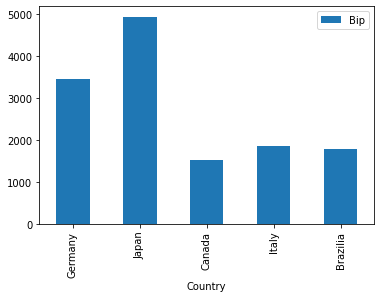

In [2]:
#Import der Hilfsbibliotheken
import pandas as pd
import matplotlib as plt

#Laden der CSV per URL in das Pandas-Dataframe
url = 'https://raw.githubusercontent.com/edlich/eternalrepo/master/DS-WAHLFACH/countries.csv'
dataframe = pd.read_csv(url, on_bad_lines='skip')

#1. Einfache Basisinformationen
rows = len(dataframe)
columns = len(dataframe.columns)
shape = dataframe.shape
elements = dataframe.size

print('Number of rows: ' + str(rows))
print('Number of columns: ' + str(columns))
print('Shape of the table: ' + str(shape))
print('Number of elements: ' + str(elements))
print('This is what the dataframe looks like: ')
display(dataframe)

#2. Einfache statistische Betrachtungen
print('Now some statistical analysis!')

#2.1 Summe, Mittelwert, Standardabweichung am Beispiel einer Spalte
sum_people = dataframe['People'].sum()
mean_people = sum_people / rows
stddev_people = round(dataframe['People'].std(), 2)
print('The sum of all people of the 5 countries is: ' + str(sum_people))
print('The mean of all people of the 5 countries is: ' + str(mean_people))
print('The standard deviation of all people of the 5 countries is: ' + str(stddev_people))

#2.2 Bevoelkerungsdichte am Beispiel einer Spalte
people_brazilia = dataframe.loc[dataframe['Name']=='Brazilia', 'People'].iloc[0]
size_brazilia = dataframe.loc[dataframe['Name']=='Brazilia', 'Area'].iloc[0]
population_density_brazilia = round(people_brazilia / size_brazilia, 2)
print('In Brazilia, the population density is: ' + str(population_density_brazilia) + ' residents per square kilometer')

#2.3 Haeufigkeit am Beispiel einer Spalte
currency_euro = sum(dataframe['Currency']=='EUR')
print(str(currency_euro) + ' out of the ' + str(rows) + ' countries have the Euro as their currency')
    
#2.4 Minimum am Beispiel einer Spalte
min_bip = dataframe['BIP'].min()
value = dataframe.loc[dataframe['BIP']==min_bip, 'Name'].iloc[0]
print('The country with the lowest BIP is: ' + str(value))

#Nun weitere Aufgaben
print('Now let us dig a bit deeper!')

#3. Letzten 4 Zeilen
print('Last four rows:')
display_last_four = dataframe.tail(4)
display(display_last_four)

#4. Alle Zeilen der Laender, die den Euro haben
print('Rows of Countries who have Euro as Currency:')
display_euro = dataframe[dataframe['Currency']=='EUR']
display(display_euro)

#5. Nur noch Laendername und Waehrung anzeigen
print('Only Country Name and Currency:')
display_name_currency= dataframe.drop(['People', 'Area','BIP'], axis=1)
#Anmerkung: Indexspalte bleibt, da sie für die eindeutige Identifizierung von Datensaetzen notwendig ist
display(display_name_currency)

#6. Nur noch Zeilen/Laender anzeigen, die mehr als 2.000 Mrd. USD BIP haben
print('Rows where the BIP is bigger than 2000:')
display_bip_criteria = dataframe[dataframe['BIP']>2000]
display(display_bip_criteria)

#7. Alle Laender waehlen, die zwischen 50 und 150 Mio. Einwohner haben
print('Rows where the number of People is between 50 and 150 million:')
display_people_criteria = dataframe[dataframe['People'].between(50000000, 150000000)]
display(display_people_criteria)

#8. BIP zu Bip aendern
print('Rename of column header BIP to Bip:')
dataframe.rename(columns = {'BIP':'Bip'}, inplace = True)
display(dataframe)

#9. Bip Summe bilden
print('The sum of all BIP is: ' + str(dataframe['Bip'].sum()) + ' billion USD')

#10. Durchschnittliche Anzahl an Menschen der Laender
#Hier wird gerundet, da es keine "halben" Menschen gibt
print('The mean of all people of the 5 countries is: ' + str(round(dataframe['People'].sum() / rows)))

#11. Alphabetisch sortieren nach Laendername
print('Sort by name alphabetically, ascending:')
display(dataframe.sort_values(by=['Name']))
print('Sort by name alphabetically, descending:')
display(dataframe.sort_values(by=['Name'], ascending=False))

#12. Neues Dataframe bilden, Area wie folgt ersetzt wird: BIG > 1.000.000 und SMALL <= 1.000.000
#dataframe['Area'] = dataframe['Area'].astype(int)

dataframe['Area'] = pd.to_numeric(dataframe['Area'])

for i in dataframe.index:
        if dataframe['Area'][i] > 1000000 :
            dataframe['Area'][i] = 'BIG'
        else :
            dataframe['Area'][i] = 'SMALL'
        

display(dataframe)

#13. Zusatz: Testweise Ausgabe eines Balkendiagramms am Beispiel einer Spalte

print('Let us also see what the BIP distribution looks like by country.')
dataframe2 = dataframe.drop(['People', 'Area','Currency'], axis=1)
dataframe2.set_index('Name', inplace=True)
ax = dataframe2.plot(kind='bar').set_xlabel('Country')
